# ヒント

本ノートブックでは、演習問題を取り組む上でのヒントをいくつか提示します。

## 1. 会社の位置の可視化

### パッケージ読み込み

In [1]:
# パッケージ読み込み
from __future__ import annotations
import pandas as pd
import matplotlib.pyplot as plt

# グラフ描画設定
plt.rcParams["font.family"] = "Meiryo"
plt.rcParams["savefig.facecolor"] = "white"

### 入力データ読み込み

In [2]:
# 入力データ読み込み
df = pd.read_csv("../data/in/companies.csv", index_col=0)
df.head()

,X,Y,EPT,FPT,PT,PW
CID,,,,,,
1,5,15,118,278,90,20
2,-7,-15,2573,2733,90,10
3,-15,35,2119,2279,90,20
4,-17,2,209,369,90,10
5,25,10,1546,1706,90,30


### 定数の定義

In [3]:
# 定数
# デポ
df_depo = pd.DataFrame([[0 for _ in range(len(df.columns))]], columns=df.columns)
df_depo.index.name = df.index.name

### 会社の位置の可視化

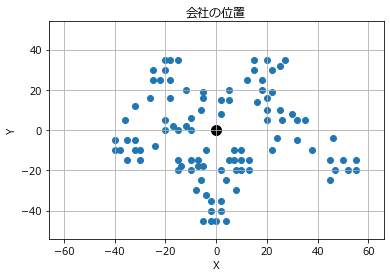

In [4]:
# 会社の位置
_, ax = plt.subplots()
ax.scatter(df_depo["X"], df_depo["Y"], c="black", s=100)
ax.scatter(df["X"], df["Y"])
x_lim, y_lim = max(abs(df["X"])), max(abs(df["Y"]))
x_lim *= 1.2
y_lim *= 1.2
ax.set_xlim(-x_lim, x_lim)
ax.set_ylim(-y_lim, y_lim)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("会社の位置")
ax.grid()

可視化を行ったところ、会社の位置はランダムではないことが分かります。

## 2. 解の可視化

### パッケージ読み込み

In [5]:
# パッケージ読み込み
from __future__ import annotations
import pandas as pd
import matplotlib.pyplot as plt
import math

# グラフ描画設定
plt.rcParams["font.family"] = "Meiryo"
plt.rcParams["savefig.facecolor"] = "white"

### 入力データ読み込み

In [6]:
# 入力データ読み込み
df = pd.read_csv("../data/in/companies.csv", index_col=0)
df.head()

,X,Y,EPT,FPT,PT,PW
CID,,,,,,
1,5,15,118,278,90,20
2,-7,-15,2573,2733,90,10
3,-15,35,2119,2279,90,20
4,-17,2,209,369,90,10
5,25,10,1546,1706,90,30


### 定数の定義

In [7]:
# 定数
# 会社リスト
COMPANIES = df.index.tolist()
# 会社数
COMPANY_CNT = len(COMPANIES)
# 営業リスト
SALES = [1, 2, 3]
# 営業の人数
SALES_CNT = len(SALES)
# 営業のカバン容量
SALES_CAPACITY = 700
# デポ
df_depo = pd.DataFrame([[0 for _ in range(len(df.columns))]], columns=df.columns)
df_depo.index.name = df.index.name

### 評価関数値を取得する関数を定義

In [8]:
def get_obj(res: dict[int, list[int]]) -> float:
    """
    解の評価関数値を取得する.

    Args:
        res (dict[int, list[int]]): 解

    Returns:
        float: 評価関数値
    """
    obj = 0
    for k in SALES:
        t = 0
        penalty = 0
        spw = 0
        # スタート地点（原点）
        prev_x, prev_y = 0, 0
        for i in res[k]:
            # 業務時間
            x, y = df.at[i, "X"], df.at[i, "Y"]
            diff_x, diff_y = abs(x - prev_x), abs(y - prev_y)
            t += math.sqrt(diff_x*diff_x + diff_y*diff_y)

            # プレゼン時間に関するペナルティ
            ept, fpt, pt = df.at[i, "EPT"], df.at[i, "FPT"], df.at[i, "PT"]
            penalty += max(ept-t, 0)
            penalty += 2*max(0, (t+pt)-fpt)

            # プレゼン時間を追加
            t += pt

            # 訪問する会社のプレゼン資料の総重量
            pw = df.at[i, "PW"]
            spw += pw

            prev_x, prev_y = x, y
        # 最後に訪問する会社からゴール地点（原点）への業務時間
        x, y = 0, 0
        diff_x, diff_y = abs(x - prev_x), abs(y - prev_y)
        t += math.sqrt(diff_x*diff_x + diff_y*diff_y)

        # カバン容量に関するペナルティ
        penalty += 10*max(0, spw-SALES_CAPACITY)

        obj += t + penalty
    return obj

### 解を可視化する関数を定義

In [9]:
def show_result(res: dict[int, list[int]]) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    解を可視化する.

    Args:
        res (dict[int, list[int]]): 解

    Returns:
        tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]: 営業毎の解
    """
    # 解をデータフレームに変換
    df1 = df.loc[res[1]]
    df2 = df.loc[res[2]]
    df3 = df.loc[res[3]]

    # 会社の訪問順
    _, ax = plt.subplots()
    ax.scatter(df_depo["X"], df_depo["Y"], c="black", s=100)
    ax.scatter(df1["X"], df1["Y"], c="red")
    ax.scatter(df2["X"], df2["Y"], c="blue")
    ax.scatter(df3["X"], df3["Y"], c="green")
    ax.plot(pd.concat([df_depo["X"], df1["X"], df_depo["X"]]), pd.concat([df_depo["Y"], df1["Y"], df_depo["Y"]]), c="red")
    ax.plot(pd.concat([df_depo["X"], df2["X"], df_depo["X"]]), pd.concat([df_depo["Y"], df2["Y"], df_depo["Y"]]), c="blue")
    ax.plot(pd.concat([df_depo["X"], df3["X"], df_depo["X"]]), pd.concat([df_depo["Y"], df3["Y"], df_depo["Y"]]), c="green")
    x_lim, y_lim = max(abs(df["X"])), max(abs(df["Y"]))
    x_lim *= 1.2
    y_lim *= 1.2
    ax.set_xlim(-x_lim, x_lim)
    ax.set_ylim(-y_lim, y_lim)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("会社の位置（訪問順）")
    ax.grid()

    return df1, df2, df3

1: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100]
2: [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98]
3: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]
259592.1405093539


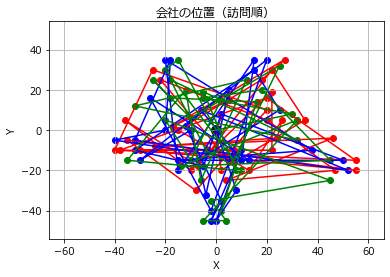

In [10]:
# 初期解作成
# res[k]：営業kの会社訪問順リスト
res = {k: [] for k in SALES}
# 会社を営業人数分均等に分ける
k = 0
for i in COMPANIES:
    res[k+1].append(i)
    k = (k+1) % SALES_CNT
obj = get_obj(res)

# 結果出力
for k in SALES:
    print(f"{k}: {res[k]}")
print(obj)
df1, df2, df3 = show_result(res)

初期解を可視化したところ、各営業が色々な会社に訪問していることが分かります。

## 3. 近傍操作

近傍操作は、解に対してどのような改善を実施したいか考えて作ると良いです。  
swap操作以外に、一般的な近傍操作として「insert操作」があります。これは、例えば「営業$k_1$の$i_1$番目に訪問する会社を営業$k_2$の$i_2 \sim i_2+1$番目間に挿入する」を行う操作です。

## 4. 求解手法

求解手法として、局所探索法以外に「シミュレーテッドアニーリング法」、「タブー探索法」などがあります。

「シミュレーテッドアニーリング法」では、改悪の場合も確率的に解の遷移を許容します。このときの遷移確率は「温度」と呼ばれるパラメータで管理され、温度が高い場合は遷移確率も高く、温度が低い場合は遷移確率も低くなります。以下に「シミュレーテッドアニーリング法」のアルゴリズムを示します。

1. 初期解$\boldsymbol{\sigma}$を生成する。
2. 初期温度$T$を設定する。
3. 温度$T$が下がりきるまで以下を実施する。
   1. 近傍解$\boldsymbol{\sigma}^{\prime}$を生成する。
   2. 現在解$\boldsymbol{\sigma}$より近傍解$\boldsymbol{\sigma}^{\prime}$の方が良い場合、現在解を$\boldsymbol{\sigma}^{\prime}$に置き換える。
   3. 現在解$\boldsymbol{\sigma}$より近傍解$\boldsymbol{\sigma}^{\prime}$の方が悪い場合、確率的に現在解を$\boldsymbol{\sigma}^{\prime}$に置き換える。  
      遷移確率として、$\exp{\left(-\Delta E/T\right)}$がよく使用されます。ここで、$\Delta E$は現在解と近傍解の評価関数値の差の絶対値を表します。
4. 最良解$\boldsymbol{\sigma}$を出力する。

「タブー探索法」では、改悪の場合も解の遷移を許容します。このとき、いくつかの解を経由して元の解に戻ってしまうこと（サイクリング）を防ぐため、「タブーリスト」と呼ばれる解集合に含まれる解（禁止解）への遷移は禁止します。以下に「タブー探索法」のアルゴリズムを示します。

1. 初期解$\boldsymbol{\sigma}$を生成する。
2. 一定時間以下を実施する。
   1. 近傍解を複数生成し、その中で禁止解を除く最良解$\boldsymbol{\sigma}^{\prime}$を見つける。
   3. 現在解を$\boldsymbol{\sigma}^{\prime}$に置き換える。
3. 最良解$\boldsymbol{\sigma}$を出力する。